In [30]:
# Importing required Libraries
import pandas as pd

In [31]:
data=pd.read_csv('Converted_file.csv')
data.head()

,date,location_ordinal,sku,price,discount,color_desc,style_desc,pid_desc,district_ordinal,state_ordinal,Discount,store_ID
0,20160131,1,234,8.0,2.61,BLACK,SML BLK HTHR HP BSC,SML BLK HTHR HP BSC,6,9,0.32625,961
1,20160131,1,325,8.0,2.61,GREY/BLACK,SM GRY/BK STP BS BSC,SM GRY/BK STP BS BSC,6,9,0.32625,961
2,20160131,1,454,8.0,2.60,SUGARED AL,SMLS NUDE BS BSC,SMLS NUDE BS BSC,6,9,0.32500,961
3,20160131,1,456,8.0,2.58,SUGARED AL,SMLS NUDE BS BSC,SMLS NUDE BS BSC,6,9,0.32250,961
4,20160131,1,458,8.0,2.61,SUGARED AL,SMLS NUDE BS BSC,SMLS NUDE BS BSC,6,9,0.32625,961


## Data Cleaning

In [39]:
# Changing the 7.98 price to 8
data.loc[data['price'] == 7.98, 'price'] = 8
# Removing data with negative values of discount
data=data.loc[data['discount']>=0,]
# Converting 'date' column to required date format
data['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
data.head()

,date,location_ordinal,sku,price,discount,color_desc,style_desc,pid_desc,district_ordinal,state_ordinal,Discount,store_ID
0,2016-01-31,1,234,8.0,2.61,BLACK,SML BLK HTHR HP BSC,SML BLK HTHR HP BSC,6,9,0.32625,961
1,2016-01-31,1,325,8.0,2.61,GREY/BLACK,SM GRY/BK STP BS BSC,SM GRY/BK STP BS BSC,6,9,0.32625,961
2,2016-01-31,1,454,8.0,2.60,SUGARED AL,SMLS NUDE BS BSC,SMLS NUDE BS BSC,6,9,0.32500,961
3,2016-01-31,1,456,8.0,2.58,SUGARED AL,SMLS NUDE BS BSC,SMLS NUDE BS BSC,6,9,0.32250,961
4,2016-01-31,1,458,8.0,2.61,SUGARED AL,SMLS NUDE BS BSC,SMLS NUDE BS BSC,6,9,0.32625,961


In [44]:
# Finding number of entries for Store-SKU combination
store_sku_counts=data.groupby(['sku', 'store_ID']).size().reset_index(name='counts')

In [49]:
store_sku_counts[store_sku_counts.counts==store_sku_counts.counts.max()]

,sku,store_ID,counts
37799,656,943,380


In [52]:
# Using store number 943 and  sku 656 for our initial CRF
crf_store_sku=data[(data.sku==656) & (data.store_ID==943)]


In [66]:
x_values=crf_store_sku.date.reset_index(drop=1)
y_values=crf_store_sku.Discount.reset_index(drop=1)

In [68]:
import matplotlib.pyplot as plt

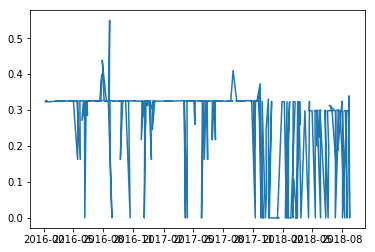

In [69]:
plt.plot(x_values,y_values)

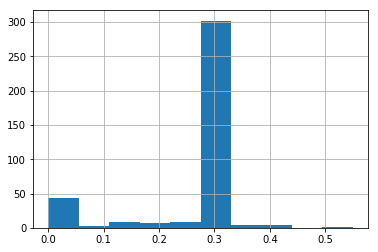

In [70]:
crf_store_sku.Discount.hist()

In [75]:
crf_store_sku2=data[(data.store_ID==943) & (data.style_desc=='PCTN BLACK BK')&]

In [85]:
crf_store_sku2.sku.value_counts()

651    353
652    341
650    231
653    140
649     40
151     13
Name: sku, dtype: int64

In [86]:
sku_651=crf_store_sku2[crf_store_sku2.sku==651]
sku_652=crf_store_sku2[crf_store_sku2.sku==652]

In [88]:
sku_651.to_csv('sku_651.csv')
sku_652.to_csv('sku_652.csv')

0 --> A

0-20--> B

20-35--> C

35-40--> D

40-60-->E

60+-->F

In [91]:
# Genrating buckets for discount percentage
def generate_bucket(discount):
    if(discount==0):
        return('A')
    elif(discount<0.20):
        return('B')
    elif(discount<0.35):
        return('C')
    elif(discount<0.40):
        return('D')
    elif(discount<0.60):
        return('E')
    else:
        return('F')
        

In [98]:
crf_store_sku['discount_bucket']=crf_store_sku.Discount.apply(generate_bucket)

C:\Users\Gautam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
crf_store_sku=crf_store_sku.reset_index(drop=1)
# Generating Min date
min_date=data.date.min()
#Finding week_number


In [121]:
week_number=[]
for i in range(0,len(crf_store_sku.date) ):
    week_number.append(round((crf_store_sku.date[i]-min_date).days/7))

In [123]:
crf_store_sku['week_number']=week_number

In [125]:
crf_store_sku.week_number.unique()

array([  1,   6,   5,   7,   8,   9,  10,  11,  13,  12,  14,  15,  16,
        17,  19,  18,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
        30,  31,  32,  33,  34,  35,  37,  36,  38,  40,  39,  42,  43,
        44,  45,  46,  47,  48,  49,  52,  51,  53,  54,  55,  56,  62,
        61,  63,  64,  65,  66,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  80,  81,  83,  82,  84,  85,  86,  87,  88,  91,
        90,  93,  92,  94,  95,  96,  97,  98, 100,  99, 101, 103, 102,
       104, 105, 106, 107, 108, 110, 109, 111, 112, 113, 114, 116, 117,
       119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134], dtype=int64)

In [127]:
weekly_data=pd.read_csv('651and652_Average.csv')

In [129]:
weekly_data['discount_bucket']=weekly_data.Avg.apply(generate_bucket)

In [134]:
weekly_data.Week.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133], dtype=int64)

In [140]:
# For weeks which dont have data in them, we are imputing it with the mode bucket i.e bucket C
weekly_data[weekly_data.Avg==-9999].discount_bucket='C'

C:\Users\Gautam\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,Week,Duration,Avg,discount_bucket
0,1,07-02-2016 - 13-02-2016,0.326250,C
1,2,14-02-2016 - 20-02-2016,0.325313,C
2,3,21-02-2016 - 27-02-2016,0.326042,C
3,4,28-02-2016 - 05-03-2016,0.325000,C
4,5,06-03-2016 - 12-03-2016,0.325000,C
5,6,13-03-2016 - 19-03-2016,0.325000,C
6,7,20-03-2016 - 26-03-2016,0.238750,C
7,8,27-03-2016 - 02-04-2016,0.162500,B
8,9,03-04-2016 - 09-04-2016,0.325500,C
9,10,10-04-2016 - 16-04-2016,0.325833,C


In [142]:
import pycrfsuite

In [148]:
train=weekly_data[weekly_data.Week<=100]
test=weekly_data[weekly_data.Week>100]

In [239]:
y = list(train.discount_bucket)
X = []
for i in range(len(train)):
    X.append(['bias', 'week=' + str(train.Week[i])])

In [240]:
test = test.reset_index(drop=1)
test.Avg[i]

KeyError: 99

In [241]:
trainer = pycrfsuite.Trainer(verbose=False)

In [242]:
trainer.append(X,y)

In [243]:
trainer.set_params({
    'c1': 1.0,   # coefficient for L1 penalty
    'c2': 1e-3,  # coefficient for L2 penalty
    'max_iterations': 50,  # stop earlier

    # include transitions that are possible, but not observed
    'feature.possible_transitions': True
})
trainer.select('ap')
#trainer.select('l2sgd')

In [244]:
trainer.train('rajeshwari')

In [245]:
tagger = pycrfsuite.Tagger()
tagger.open('rajeshwari')

In [246]:
test = test.reset_index(drop=1)
y1 = list(test.discount_bucket)
X1 = []
for i in range(len(test)):
    X1.append(['bias', 'week=' + str(test.Week[i])])

In [255]:
test_pred = (tagger.tag(X1))
print(y1)
print(test_pred)

['A', 'B', 'B', 'B', 'B', 'B', 'C', 'B', 'C', 'B', 'C', 'C', 'B', 'C', 'B', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']


In [247]:
predictions = tagger.tag(X)
print(y)
print(predictions)

['C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'B', 'B', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'B', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'D', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'C', 'C', 'C', 'B', 'C', 'C', 'B', 'B', 'B']
['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'B'

In [248]:
counter = 0
for i in range(0,len(y)):
    if(predictions[i]==y[i]):
        counter += 1 

In [249]:
counter /len(y)

0.82

In [253]:
counter1 = 0
for i in range(0,len(y1)):
    if(test_pred==y1[i]):
        counter1 += 1 

In [254]:
counter1/len(y1)

0.0